# CODIGO EM PARTES

In [12]:
import requests
from PIL import Image
from bs4 import BeautifulSoup
import pandas as pd

## PEGANDO O HTML DO SITE

In [30]:
#link = "https://boxd.it/9Ydm" # que horas ela volta (um país)
#link = "https://boxd.it/3mDa"   # Under the Skin (varios paises)
#link = "https://boxd.it/4VZ8"  # Interestelar (muitos atores)
#link = "https://boxd.it/pUfA"  # Duna parte 2 (ainda nao lancado)
link = "https://boxd.it/f5eG"  # Nosferatu (sem data de lancamento)
#link = "https://boxd.it/27nY"   # Me, myself and Irene
requisicao = requests.get(link)
site = BeautifulSoup(requisicao.text, "html.parser")
#print(site.prettify())


## FILTRANDO O JSON COM AS INFORMACOES

In [31]:
#https://pt.stackoverflow.com/questions/487777/como-utilizar-o-find-do-beautifulsoup-para-encontrar-uma-tag-script-com-tipo-e
a = site.find('script', type="application/ld+json")
#https://stackoverflow.com/questions/43655169/how-to-parse-ldjson-using-python
c = a.contents
c

['\n/* <![CDATA[ */\n{"image":"https://a.ltrbxd.com/resized/film-poster/3/5/9/5/0/5/359505-nosferatu-0-230-0-345-crop.jpg?v=4629dcea66","@type":"Movie","director":[{"@type":"Person","name":"Robert Eggers","sameAs":"/director/robert-eggers/"}],"dateModified":"2023-11-28","productionCompany":[{"@type":"Organization","name":"Studio 8","sameAs":"/studio/studio-8/"},{"@type":"Organization","name":"Focus Features","sameAs":"/studio/focus-features/"},{"@type":"Organization","name":"Stillking Films","sameAs":"/studio/stillking-films/"},{"@type":"Organization","name":"Maiden Voyage Pictures","sameAs":"/studio/maiden-voyage-pictures/"}],"@context":"http://schema.org","url":"https://letterboxd.com/film/nosferatu-1/","actors":[{"@type":"Person","name":"Bill Skarsgård","sameAs":"/actor/bill-skarsgard/"},{"@type":"Person","name":"Lily-Rose Depp","sameAs":"/actor/lily-rose-depp/"},{"@type":"Person","name":"Nicholas Hoult","sameAs":"/actor/nicholas-hoult/"},{"@type":"Person","name":"Aaron Taylor-Johns

## PEGANDO A IMAGEM DA CAPA

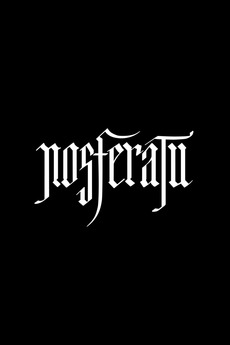

In [32]:
# LOCALIZANDO A POSICAO DO LINK DA IMAGEM
ii = c[0].find("image")
jj = c[0].find(".jpg")
#print(ii)
#print(jj)
# PEGANDO O LINK DA IMAGEM
link_imagem = c[0][ii+8:jj+4]
# REQUISICAO E APRESENTACAO DA IMAGEM
im = Image.open(requests.get(link_imagem, stream=True).raw)
im

### DADOS DE REFERENCIA DO FILME

In [33]:
####
# 1 - Diretor
id_diretor_init = c[0].find("director")
id_diretor_fim = c[0].find('"dateModified":')
info_diretor = c[0][id_diretor_init:id_diretor_fim]
id_nome_init = info_diretor.find("name")
id_nome_fim = info_diretor.find("sameAs")
nome_diretor = info_diretor[id_nome_init+7:id_nome_fim-3]
print(f"Nome do Diretor: {nome_diretor}")

# 2 - Ano de lancamento
def is_int(s):
    try:
        int(s)
    except ValueError:
        return 'Sem data de Lancamento'
    else:
        return s

id_anolancamento = c[0].find("startDate")
ano_lancamento = c[0][id_anolancamento+12:id_anolancamento+16]
print(f"Ano de Lancamento: {is_int(ano_lancamento)}")

# 3 - Avaliacao
id_avaliacao = c[0].find("ratingValue")
id_aval_fim = c[0].find(',"description"')
if id_avaliacao != -1:
  avaliacao = c[0][id_avaliacao+13:id_aval_fim]
  avaliacao = float(avaliacao)
  print(f"Avaliacao Media: {avaliacao}")
else:
  avaliacao = "Null"
  print("Avaliacao Media: Nao Ha Avaliacoes")

# 4 - País de origem
id_pais_init = c[0].find("countryOfOrigin")
id_pais_fim = c[0].find("aggregateRating")
info_paises = c[0][id_pais_init+18:id_pais_fim-3]
#print(info_paises)
num_paises = info_paises.count("Country")
#print(num_paises)
if num_paises == 1:
  idx_pais_init = info_paises.find('me"')
  idx_pais_fim = info_paises.find('"}')
  paises = info_paises[idx_pais_init+5:idx_pais_fim]
  print(f"Pais de Origem: {paises}")
else:
  info_paises = info_paises.split('},{')
  paises = []
  for k in range(num_paises):
    idx_pais_init = info_paises[k].find('me"')
    idx_pais_fim = info_paises[k].find('"}')
    pais = info_paises[k][idx_pais_init+5:idx_pais_fim]
    paises.append(pais)
  print(f"Pais de Origem: {paises}")

# 5 - Contagem de avaliacoes
if id_avaliacao != -1:
  id_cont_av = c[0].find("ratingCount")
  id_cont_fim = c[0].find('"wor')
  cont_av = c[0][id_cont_av+13:id_cont_fim-1]
  print(f'Numero de Avaliacoes: {cont_av}')
else:
  cont_av = 0
  print(f'Numero de Avaliacoes: {cont_av}')



Nome do Diretor: Robert Eggers
Ano de Lancamento: Sem data de Lancamento
Avaliacao Media: Nao Ha Avaliacoes
Pais de Origem: ['Czechia', 'USA']
Numero de Avaliacoes: 0


In [21]:
#######################################
kk = c[0].find("dateCreated")
kj = c[0].find("@id")
dados = c[0][kk-1:kj-2]
print(dados)
new_data = dados.split('","',3)
print(new_data)

"dateCreated":"2011-06-22","name":"Me, Myself & Irene","genre":["Comedy"]
['"dateCreated":"2011-06-22', 'name":"Me, Myself & Irene', 'genre":["Comedy"]']


In [34]:
#######################################
kk = c[0].find("dateCreated")
kj = c[0].find("@id")
dados = c[0][kk-1:kj-2]
print(dados)
# 1 - Data de adicao no site
new_data = dados.split('","',2)

id_data_in = new_data[0].find('":"')
data_adicao = new_data[0][id_data_in+3:len(new_data[0])]
data_adicao = data_adicao.replace("-","/")
print(f"Data de Adicao: {data_adicao}")

# 2 - Nome do filme
id_data_in = new_data[1].find('":"')
nome = new_data[1][id_data_in+3:len(new_data[1])]
print(f"Nome do Filme: {nome}")

# 3 - Genero
id_data_in = new_data[2].find('":')
generos = new_data[2][id_data_in+3:len(new_data[2])-1]
generos = generos.replace('"',"").split(sep=',')
print(f"Generos: {generos}")


"dateCreated":"2016-11-15","name":"Nosferatu","genre":["Drama","Fantasy","Horror"]
Data de Adicao: 2016/11/15
Nome do Filme: Nosferatu
Generos: ['Drama', 'Fantasy', 'Horror']


In [ ]:
c

In [ ]:
id_ator_init = c[0].find("actors")
#print(id_ator_init)
id_ator_fim = c[0].find("dateCreated")
#print(id_ator_fim)
lista_noize_atores = c[0][id_ator_init+9:id_ator_fim-3]
lista_lista_atores = lista_noize_atores.split('{"@type":"Person","name":')
atores = []
for k in range(len(lista_lista_atores)-1):
    index_ator = lista_lista_atores[k+1].find(',"')
    #print(lista_lista_atores[k+1][:index_ator])
    atores.append(lista_lista_atores[k+1][1:index_ator-1])

print(f'Elenco:')
type(atores)

Elenco:


list

## LINKS DE REFERENCIA

[SPLIT PYTHON](https://www.w3schools.com/python/ref_string_split.asp)

In [ ]:
# https://www.w3schools.com/python/ref_string_split.asp
# https://kenzie.com.br/blog/string-python/
# https://stackoverflow.com/questions/7391945/how-do-i-read-image-data-from-a-url-in-python
# https://stackoverflow.com/questions/1265665/how-can-i-check-if-a-string-represents-an-int-without-using-try-except

# CODIGO COMPLETO

## BIBLIOTECAS

In [ ]:
import requests
from PIL import Image
from bs4 import BeautifulSoup

## CODIGO

In [35]:
def search_letterbox(link):
  requisicao = requests.get(link)
  site = BeautifulSoup(requisicao.text, "html.parser")
  a = site.find('script', type="application/ld+json")
  c = a.contents

  ######################## CAPA DO FILME ####################
  ii = c[0].find("image")
  jj = c[0].find(".jpg")
  # PEGANDO O LINK DA IMAGEM
  link_imagem = c[0][ii+8:jj+4]
  ############################################################

  ################## INFOS GERAIS DO FILME ###################
  # 1 - Diretor
  id_diretor_init = c[0].find("director")
  id_diretor_fim = c[0].find('"dateModified":')
  info_diretor = c[0][id_diretor_init:id_diretor_fim]
  id_nome_init = info_diretor.find("name")
  id_nome_fim = info_diretor.find("sameAs")
  nome_diretor = info_diretor[id_nome_init+7:id_nome_fim-3]

  # 2 - Ano de lancamento
  def is_int(s):
    try:
        int(s)
    except ValueError:
        return float('nan')
    else:
        return int(s)

  id_anolancamento = c[0].find("startDate")
  ano_lancamento = c[0][id_anolancamento+12:id_anolancamento+16]
  ano_lancamento = is_int(ano_lancamento)

  # 3 - Avaliacao
  id_avaliacao = c[0].find("ratingValue")
  id_aval_fim = c[0].find(',"description"')
  if id_avaliacao != -1:
    avaliacao = c[0][id_avaliacao+13:id_aval_fim]
    avaliacao = float(avaliacao)
  else:
    avaliacao = float("nan")

  # 4 - País de origem
  id_pais_init = c[0].find("countryOfOrigin")
  id_pais_fim = c[0].find("aggregateRating")
  info_paises = c[0][id_pais_init+18:id_pais_fim-3]
  num_paises = info_paises.count("Country")
  if num_paises == 1:
    idx_pais_init = info_paises.find('me"')
    idx_pais_fim = info_paises.find('"}')
    paises = info_paises[idx_pais_init+5:idx_pais_fim]
  else:
    info_paises = info_paises.split('},{')
    paises = []
    for k in range(num_paises):
      idx_pais_init = info_paises[k].find('me"')
      idx_pais_fim = info_paises[k].find('"}')
      pais = info_paises[k][idx_pais_init+5:idx_pais_fim]
      paises.append(pais)

  # 5 - Contagem de avaliacoes
  if id_avaliacao != -1:
    id_cont_av = c[0].find("ratingCount")
    id_cont_fim = c[0].find('"wor')
    cont_av = c[0][id_cont_av+13:id_cont_fim-1]
  else:
    cont_av = 0

  # 6 - Data de adicao no site
  kk = c[0].find("dateCreated")
  kj = c[0].find("@id")
  dados = c[0][kk-1:kj-2]
  new_data = dados.split('","',2)
  id_data_in = new_data[0].find('":"')
  data_adicao = new_data[0][id_data_in+3:len(new_data[0])]
  data_adicao = data_adicao.replace("-","/")

  # 7 - Nome do filme
  id_data_in = new_data[1].find('":"')
  nome = new_data[1][id_data_in+3:len(new_data[1])]

  # 8 - Genero
  id_data_in = new_data[2].find('":')
  generos = new_data[2][id_data_in+3:len(new_data[2])-1]
  generos = generos.replace('"',"").split(sep=',')

  ####################### ELENCO ########################
  id_ator_init = c[0].find("actors")
  #print(id_ator_init)
  id_ator_fim = c[0].find("dateCreated")
  #print(id_ator_fim)
  lista_noize_atores = c[0][id_ator_init+9:id_ator_fim-3]
  lista_lista_atores = lista_noize_atores.split('{"@type":"Person","name":')
  atores = []
  for k in range(len(lista_lista_atores)-1):
      index_ator = lista_lista_atores[k+1].find(',"')
      #print(lista_lista_atores[k+1][:index_ator])
      atores.append(lista_lista_atores[k+1][1:index_ator-1])

  dados_gerais = [nome,ano_lancamento,nome_diretor,generos,atores,avaliacao,paises,int(cont_av),data_adicao,link_imagem]
  return dados_gerais

## LINK DO FILME

In [40]:
link = "https://boxd.it/9Ydm" # que horas ela volta (um país)
#link = "https://boxd.it/3mDa"   # Under the Skin (varios paises)
#link = "https://boxd.it/4VZ8"  # Interestelar (muitos atores)
#link = "https://boxd.it/pUfA"  # Duna parte 2 (ainda nao lancado)
#link = "https://boxd.it/f5eG"  # Nosferatu (sem data de lancamento)
#link = "https://boxd.it/27nY"   # Me, myself and Irene

In [41]:
dados_filme = search_letterbox(link)
dados_filme


['The Second Mother',
 2015,
 'Anna Muylaert',
 ['Drama'],
 ['Regina Casé',
  'Camila Márdila',
  'Karine Teles',
  'Lourenço Mutarelli',
  'Michel Joelsas',
  'Helena Albergaria',
  'Bete Dorgam',
  'Luis Miranda',
  'Theo Werneck',
  'Luci Pereira',
  'Anapaula Csernik',
  'Hugo Villavicenzio',
  'Roberto Camargo',
  'Alex Huszar',
  'Andrey Lima Lopes',
  'Thaise Reis',
  'Nilcéia Vicente'],
 4.08,
 'Brazil',
 53080,
 '2014/12/13',
 'https://a.ltrbxd.com/resized/sm/upload/xh/j7/g3/yc/lmT09SibdM53xWIzJmKSK4ONcB7-0-230-0-345-crop.jpg']

In [42]:
df = pd.DataFrame(data=[dados_filme],
                  columns=['Filme','Lancamento','Diretor','Generos','Atores','Avaliacao','Paises','Num_Av','data_adicao','link_imagem'])

df

,Filme,Lancamento,Diretor,Generos,Atores,Avaliacao,Paises,Num_Av,data_adicao,link_imagem
0,The Second Mother,2015,Anna Muylaert,[Drama],"[Regina Casé, Camila Márdila, Karine Teles, Lo...",4.08,Brazil,53080,2014/12/13,https://a.ltrbxd.com/resized/sm/upload/xh/j7/g...


In [43]:
df.dtypes

Filme           object
Lancamento       int64
Diretor         object
Generos         object
Atores          object
Avaliacao      float64
Paises          object
Num_Av           int64
data_adicao     object
link_imagem     object
dtype: object

# DATA FRAME DA WATCHLIST

In [44]:
path_watchlist = '/content/drive/MyDrive/Colab Notebooks/util_watchlist_mozir.csv'
df_watchlist = pd.read_csv(path_watchlist)
url_letterbox = df_watchlist['Letterboxd URI']
cont = 0
all_movies = []
for k in range(len(url_letterbox)):
  all_movies.append(search_letterbox(url_letterbox[k]))
  if k == round(len(url_letterbox)*(0.1*cont)):
    print(f'Progresso de: {cont*10}% ')
    cont = cont + 1


Progresso de: 0% 
Progresso de: 10% 
Progresso de: 20% 
Progresso de: 30% 
Progresso de: 40% 
Progresso de: 50% 
Progresso de: 60% 
Progresso de: 70% 
Progresso de: 80% 
Progresso de: 90% 


In [45]:
len(all_movies)

417

In [46]:
df2 = pd.DataFrame(data=all_movies,
                  columns=['Filme','Lancamento','Diretor','Generos','Atores','Avaliacao','Paises','Votos','data_adicao','link_imagem'])

df2

,Filme,Lancamento,Diretor,Generos,Atores,Avaliacao,Paises,Votos,data_adicao,link_imagem
0,Batman & Robin,1997.0,Joel Schumacher,"[Adventure, Science Fiction, Action]","[George Clooney, Uma Thurman, Chris O'Donnell,...",1.81,USA,191875,2011/06/22,https://a.ltrbxd.com/resized/sm/upload/xx/iy/m...
1,The Hobbit: The Battle of the Five Armies,2014.0,Peter Jackson,"[Fantasy, Action, Adventure]","[Martin Freeman, Ian McKellen, Richard Armitag...",3.12,"[New Zealand, USA]",371934,2012/07/31,https://a.ltrbxd.com/resized/film-poster/9/6/5...
2,The Jungle Book,2016.0,Jon Favreau,"[Family, Fantasy, Drama, Adventure]","[Neel Sethi, Bill Murray, Ben Kingsley, Idris ...",3.20,"[UK, USA]",239659,2014/06/28,https://a.ltrbxd.com/resized/sm/upload/re/d0/v...
3,Guardians,2017.0,Sarik Andreasyan,"[Action, Thriller, Science Fiction, Comedy, Fa...","[Anton Pampushnyy, Sanjar Madi, Sebastien Sisa...",1.96,Russian Federation,6191,2015/08/17,https://a.ltrbxd.com/resized/film-poster/2/8/5...
4,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0,Joachim Rønning,"[Action, Fantasy, Adventure]","[Johnny Depp, Javier Bardem, Geoffrey Rush, Br...",2.58,USA,271338,2013/02/08,https://a.ltrbxd.com/resized/film-poster/1/2/3...
...,...,...,...,...,...,...,...,...,...,...
412,The Creator,2023.0,Gareth Edwards,"[Action, Science Fiction, Thriller]","[John David Washington, Madeleine Yuna Voyles,...",3.35,"[Canada, USA]",169146,2020/02/07,https://a.ltrbxd.com/resized/film-poster/5/9/5...
413,When Evil Lurks,2023.0,Demián Rugna,"[Horror, Thriller]","[Ezequiel Rodríguez, Demián Salomón, Silvina S...",3.61,"[Argentina, USA]",64097,2020/09/20,https://a.ltrbxd.com/resized/film-poster/6/6/6...
414,Dream Scenario,2023.0,Kristoffer Borgli,"[Comedy, Fantasy]","[Nicolas Cage, Julianne Nicholson, Dylan Baker...",3.66,USA,28378,2021/04/28,https://a.ltrbxd.com/resized/film-poster/7/3/9...
415,Totally Killer,2023.0,Nahnatchka Khan,"[Comedy, Science Fiction, Horror]","[Kiernan Shipka, Olivia Holt, Julie Bowen, Cha...",3.13,USA,179464,2022/05/13,https://a.ltrbxd.com/resized/film-poster/8/7/7...


In [47]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Filme        417 non-null    object 
 1   Lancamento   415 non-null    float64
 2   Diretor      417 non-null    object 
 3   Generos      417 non-null    object 
 4   Atores       417 non-null    object 
 5   Avaliacao    412 non-null    float64
 6   Paises       417 non-null    object 
 7   Votos        417 non-null    int64  
 8   data_adicao  417 non-null    object 
 9   link_imagem  417 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 32.7+ KB


In [48]:
type(df2["Paises"][3])

str

In [49]:
for kk in range(len(df2["Generos"])):
  if type(df2["Generos"][kk]) != str:
    df2["Generos"][kk] = ','.join(df2["Generos"][kk])
  if type(df2["Atores"][kk]) != str:
    df2["Atores"][kk] = ','.join(df2["Atores"][kk])
  if type(df2["Paises"][kk]) != str:
    df2["Paises"][kk] = ','.join(df2["Paises"][kk])



<ipython-input-49-e108fc7c0d28>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Generos"][kk] = ','.join(df2["Generos"][kk])
<ipython-input-49-e108fc7c0d28>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Atores"][kk] = ','.join(df2["Atores"][kk])
<ipython-input-49-e108fc7c0d28>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Paises"][kk] = ','.join(df2["Paises"][kk])


In [50]:
df2

,Filme,Lancamento,Diretor,Generos,Atores,Avaliacao,Paises,Votos,data_adicao,link_imagem
0,Batman & Robin,1997.0,Joel Schumacher,"Adventure,Science Fiction,Action","George Clooney,Uma Thurman,Chris O'Donnell,Arn...",1.81,USA,191875,2011/06/22,https://a.ltrbxd.com/resized/sm/upload/xx/iy/m...
1,The Hobbit: The Battle of the Five Armies,2014.0,Peter Jackson,"Fantasy,Action,Adventure","Martin Freeman,Ian McKellen,Richard Armitage,L...",3.12,"New Zealand,USA",371934,2012/07/31,https://a.ltrbxd.com/resized/film-poster/9/6/5...
2,The Jungle Book,2016.0,Jon Favreau,"Family,Fantasy,Drama,Adventure","Neel Sethi,Bill Murray,Ben Kingsley,Idris Elba...",3.20,"UK,USA",239659,2014/06/28,https://a.ltrbxd.com/resized/sm/upload/re/d0/v...
3,Guardians,2017.0,Sarik Andreasyan,"Action,Thriller,Science Fiction,Comedy,Fantasy...","Anton Pampushnyy,Sanjar Madi,Sebastien Sisak,A...",1.96,Russian Federation,6191,2015/08/17,https://a.ltrbxd.com/resized/film-poster/2/8/5...
4,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0,Joachim Rønning,"Action,Fantasy,Adventure","Johnny Depp,Javier Bardem,Geoffrey Rush,Brento...",2.58,USA,271338,2013/02/08,https://a.ltrbxd.com/resized/film-poster/1/2/3...
...,...,...,...,...,...,...,...,...,...,...
412,The Creator,2023.0,Gareth Edwards,"Action,Science Fiction,Thriller","John David Washington,Madeleine Yuna Voyles,Ge...",3.35,"Canada,USA",169146,2020/02/07,https://a.ltrbxd.com/resized/film-poster/5/9/5...
413,When Evil Lurks,2023.0,Demián Rugna,"Horror,Thriller","Ezequiel Rodríguez,Demián Salomón,Silvina Saba...",3.61,"Argentina,USA",64097,2020/09/20,https://a.ltrbxd.com/resized/film-poster/6/6/6...
414,Dream Scenario,2023.0,Kristoffer Borgli,"Comedy,Fantasy","Nicolas Cage,Julianne Nicholson,Dylan Baker,Mi...",3.66,USA,28378,2021/04/28,https://a.ltrbxd.com/resized/film-poster/7/3/9...
415,Totally Killer,2023.0,Nahnatchka Khan,"Comedy,Science Fiction,Horror","Kiernan Shipka,Olivia Holt,Julie Bowen,Charlie...",3.13,USA,179464,2022/05/13,https://a.ltrbxd.com/resized/film-poster/8/7/7...


In [51]:
df2['Duracao'] = df_watchlist['Duração (min)']
df2['Ano_Add'] = df_watchlist['Data  na Watchlist']
df2

,Filme,Lancamento,Diretor,Generos,Atores,Avaliacao,Paises,Votos,data_adicao,link_imagem,Duracao,Ano_Add
0,Batman & Robin,1997.0,Joel Schumacher,"Adventure,Science Fiction,Action","George Clooney,Uma Thurman,Chris O'Donnell,Arn...",1.81,USA,191875,2011/06/22,https://a.ltrbxd.com/resized/sm/upload/xx/iy/m...,125,1/21/2018
1,The Hobbit: The Battle of the Five Armies,2014.0,Peter Jackson,"Fantasy,Action,Adventure","Martin Freeman,Ian McKellen,Richard Armitage,L...",3.12,"New Zealand,USA",371934,2012/07/31,https://a.ltrbxd.com/resized/film-poster/9/6/5...,144,1/21/2018
2,The Jungle Book,2016.0,Jon Favreau,"Family,Fantasy,Drama,Adventure","Neel Sethi,Bill Murray,Ben Kingsley,Idris Elba...",3.20,"UK,USA",239659,2014/06/28,https://a.ltrbxd.com/resized/sm/upload/re/d0/v...,106,1/21/2018
3,Guardians,2017.0,Sarik Andreasyan,"Action,Thriller,Science Fiction,Comedy,Fantasy...","Anton Pampushnyy,Sanjar Madi,Sebastien Sisak,A...",1.96,Russian Federation,6191,2015/08/17,https://a.ltrbxd.com/resized/film-poster/2/8/5...,100,1/21/2018
4,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0,Joachim Rønning,"Action,Fantasy,Adventure","Johnny Depp,Javier Bardem,Geoffrey Rush,Brento...",2.58,USA,271338,2013/02/08,https://a.ltrbxd.com/resized/film-poster/1/2/3...,128,1/21/2018
...,...,...,...,...,...,...,...,...,...,...,...,...
412,The Creator,2023.0,Gareth Edwards,"Action,Science Fiction,Thriller","John David Washington,Madeleine Yuna Voyles,Ge...",3.35,"Canada,USA",169146,2020/02/07,https://a.ltrbxd.com/resized/film-poster/5/9/5...,134,10/7/2023
413,When Evil Lurks,2023.0,Demián Rugna,"Horror,Thriller","Ezequiel Rodríguez,Demián Salomón,Silvina Saba...",3.61,"Argentina,USA",64097,2020/09/20,https://a.ltrbxd.com/resized/film-poster/6/6/6...,100,10/13/2023
414,Dream Scenario,2023.0,Kristoffer Borgli,"Comedy,Fantasy","Nicolas Cage,Julianne Nicholson,Dylan Baker,Mi...",3.66,USA,28378,2021/04/28,https://a.ltrbxd.com/resized/film-poster/7/3/9...,102,10/13/2023
415,Totally Killer,2023.0,Nahnatchka Khan,"Comedy,Science Fiction,Horror","Kiernan Shipka,Olivia Holt,Julie Bowen,Charlie...",3.13,USA,179464,2022/05/13,https://a.ltrbxd.com/resized/film-poster/8/7/7...,106,10/13/2023


In [52]:
df2.to_csv("/content/drive/MyDrive/Colab Notebooks/new_watchlist_complete.csv",index=False)

# ESTUDO DO DATAFRAME GERADO

In [ ]:
import pandas as pd
import seaborn as sns
import plotly.express as px

path = '/content/drive/MyDrive/Colab Notebooks/new_watchlist_complete.csv'
df_movie = pd.read_csv(path)
df_movie

,Filme,Lancamento,Diretor,Generos,Atores,Avaliacao,Paises,Votos,data_adicao,link_imagem,Duracao,Ano_Add
0,Batman & Robin,1997.0,Joel Schumacher,"Adventure,Science Fiction,Action","George Clooney,Uma Thurman,Chris O'Donnell,Arn...",1.81,USA,191243,2011/06/22,https://a.ltrbxd.com/resized/sm/upload/xx/iy/m...,125,1/21/2018
1,The Hobbit: The Battle of the Five Armies,2014.0,Peter Jackson,"Fantasy,Action,Adventure","Martin Freeman,Ian McKellen,Richard Armitage,L...",3.12,"New Zealand,USA",370043,2012/07/31,https://a.ltrbxd.com/resized/film-poster/9/6/5...,144,1/21/2018
2,The Jungle Book,2016.0,Jon Favreau,"Family,Fantasy,Drama,Adventure","Neel Sethi,Bill Murray,Ben Kingsley,Idris Elba...",3.20,"UK,USA",238979,2014/06/28,https://a.ltrbxd.com/resized/sm/upload/re/d0/v...,106,1/21/2018
3,Guardians,2017.0,Sarik Andreasyan,"Action,Thriller,Science Fiction,Comedy,Fantasy...","Anton Pampushnyy,Sanjar Madi,Sebastien Sisak,A...",1.96,Russian Federation,6176,2015/08/17,https://a.ltrbxd.com/resized/film-poster/2/8/5...,100,1/21/2018
4,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0,Joachim Rønning,"Action,Fantasy,Adventure","Johnny Depp,Javier Bardem,Geoffrey Rush,Brento...",2.58,USA,270233,2013/02/08,https://a.ltrbxd.com/resized/film-poster/1/2/3...,128,1/21/2018
...,...,...,...,...,...,...,...,...,...,...,...,...
412,The Creator,2023.0,Gareth Edwards,"Action,Science Fiction,Thriller","John David Washington,Madeleine Yuna Voyles,Ge...",3.36,"Canada,USA",162960,2020/02/07,https://a.ltrbxd.com/resized/film-poster/5/9/5...,134,10/7/2023
413,When Evil Lurks,2023.0,Demián Rugna,"Horror,Thriller","Ezequiel Rodríguez,Demián Salomón,Silvina Saba...",3.61,"Argentina,USA",58930,2020/09/20,https://a.ltrbxd.com/resized/film-poster/6/6/6...,100,10/13/2023
414,Dream Scenario,2023.0,Kristoffer Borgli,"Comedy,Fantasy","Nicolas Cage,Julianne Nicholson,Dylan Baker,Mi...",3.66,USA,21274,2021/04/28,https://a.ltrbxd.com/resized/film-poster/7/3/9...,102,10/13/2023
415,Totally Killer,2023.0,Nahnatchka Khan,"Comedy,Science Fiction,Horror","Kiernan Shipka,Olivia Holt,Julie Bowen,Charlie...",3.13,USA,176484,2022/05/13,https://a.ltrbxd.com/resized/film-poster/8/7/7...,106,10/13/2023


In [ ]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Filme        417 non-null    object 
 1   Lancamento   415 non-null    float64
 2   Diretor      417 non-null    object 
 3   Generos      417 non-null    object 
 4   Atores       417 non-null    object 
 5   Avaliacao    412 non-null    float64
 6   Paises       417 non-null    object 
 7   Votos        417 non-null    int64  
 8   data_adicao  417 non-null    object 
 9   link_imagem  417 non-null    object 
 10  Duracao      417 non-null    object 
 11  Ano_Add      417 non-null    object 
dtypes: float64(2), int64(1), object(9)
memory usage: 39.2+ KB


## Distribuicao das Avaliacoes

<Axes: xlabel='Avaliacao', ylabel='Count'>

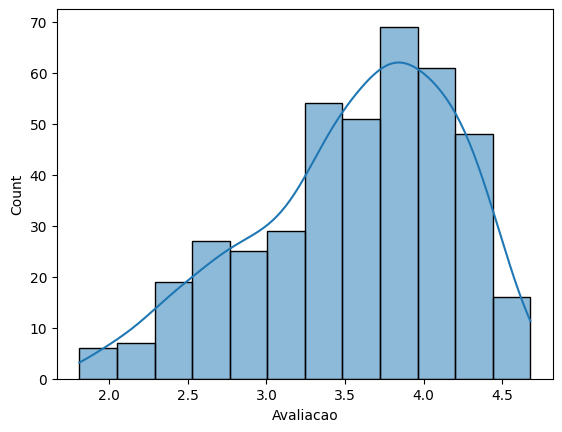

In [ ]:
sns.histplot(df_movie['Avaliacao'], kde = True)

In [ ]:
fig1 = px.histogram(df_movie,x="Avaliacao",nbins=10)
fig1.show()

In [ ]:
id_pior_avaliado = df_movie["Avaliacao"].idxmin()
id_melhor_avaliado = df_movie["Avaliacao"].idxmax()

print(f'Pior Filme: {df_movie["Filme"][id_pior_avaliado]}')
print(f'Melhor Filme: {df_movie["Filme"][id_melhor_avaliado]}')

Pior Filme: Batman & Robin
Melhor Filme: Harakiri


In [ ]:
df_movie.nlargest(20,'Avaliacao')[['Filme','Avaliacao','Diretor']].set_index('Filme')

,Avaliacao,Diretor
Filme,,
Harakiri,4.68,Masaki Kobayashi
Come and See,4.65,Elem Klimov
12 Angry Men,4.62,Sidney Lumet
Over the Garden Wall,4.61,Nate Cash
Seven Samurai,4.60,Akira Kurosawa
High and Low,4.57,Akira Kurosawa
The Human Condition III: A Soldier's Prayer,4.54,Masaki Kobayashi
Yi Yi,4.53,Edward Yang
Ikiru,4.51,Akira Kurosawa


## Distribuição por Ano de Lançamento

In [ ]:
id_lancamento_antigo = df_movie["Lancamento"].idxmin()
id_lancamento_novo = df_movie["Lancamento"].idxmax()

print(f'Filme Antigo: {df_movie["Filme"][id_lancamento_antigo]} ({int(df_movie["Lancamento"][id_lancamento_antigo])})')
print(f'Filme Novo: {df_movie["Filme"][id_lancamento_novo]} ({int(df_movie["Lancamento"][id_lancamento_novo])})')

#dif_novo_velho = int(df_movie["Lancamento"][id_lancamento_novo]) - int(df_movie["Lancamento"][id_lancamento_antigo])
#print(dif_novo_velho)

Filme Antigo: Nosferatu (1922)
Filme Novo: Dune: Part Two (2024)


In [ ]:
fig2 = px.histogram(df_movie,x="Lancamento",nbins=12,text_auto=True)
fig2.show()

## Duracao do Filme

In [ ]:
for k in range(len(df_movie["Duracao"])):
  if df_movie["Duracao"][k] == "-":
    df_movie["Duracao"][k] = int(-1)
  else:
    df_movie["Duracao"][k] = int(df_movie["Duracao"][k])

# https://stackoverflow.com/questions/39173813/pandas-convert-dtype-object-to-int
df_movie['Duracao'] = df_movie['Duracao'].astype(str).astype(int)

<ipython-input-244-71e4cb9c8074>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Filme        417 non-null    object 
 1   Lancamento   415 non-null    float64
 2   Diretor      417 non-null    object 
 3   Generos      417 non-null    object 
 4   Atores       417 non-null    object 
 5   Avaliacao    412 non-null    float64
 6   Paises       417 non-null    object 
 7   Votos        417 non-null    int64  
 8   data_adicao  417 non-null    object 
 9   link_imagem  417 non-null    object 
 10  Duracao      417 non-null    int64  
 11  Ano_Add      417 non-null    object 
dtypes: float64(2), int64(2), object(8)
memory usage: 39.2+ KB


In [ ]:
duracao_valida = df_movie[df_movie["Duracao"] > 0]
id_filme_curto = duracao_valida["Duracao"].idxmin()
id_filme_longo = duracao_valida["Duracao"].idxmax()

print(f'Filme Curto: {duracao_valida["Filme"][id_filme_curto]} ({duracao_valida["Duracao"][id_filme_curto]} min)')
print(f'Filme Longo: {duracao_valida["Filme"][id_filme_longo]} ({duracao_valida["Duracao"][id_filme_longo]} min)')

Filme Curto: Euphoria: Trouble Don't Last Always (57 min)
Filme Longo: Gone with the Wind (238 min)


In [ ]:
plot3 = px.histogram(duracao_valida, x='Duracao')
plot3.show()

## Diretores

In [ ]:
# https://www.geeksforgeeks.org/how-to-extract-the-value-names-and-counts-from-value_counts-in-pandas/
diretores_mais_listados = df_movie["Diretor"].value_counts().index.tolist()
vezes_listados = df_movie["Diretor"].value_counts()
sts_diretor = []
for k in range(len(diretores_mais_listados)):
  sts_diretor.append([diretores_mais_listados[k],vezes_listados[k]])

status_diretores = pd.DataFrame(data=sts_diretor,columns=['Diretor','Filmes_Diretor'])
status_diretores

,Diretor,Filmes_Diretor
0,Martin Scorsese,7
1,Tim Burton,7
2,Hayao Miyazaki,6
3,Steven Spielberg,5
4,Lars von Trier,5
...,...,...
305,Michael Cimino,1
306,Ivan Reitman,1
307,Renny Harlin,1
308,Gary Trousdale,1


In [ ]:
top10_diretores = status_diretores.head(10)
top10_diretores

,Diretor,Filmes_Diretor
0,Martin Scorsese,7
1,Tim Burton,7
2,Hayao Miyazaki,6
3,Steven Spielberg,5
4,Lars von Trier,5
5,Sylvester Stallone,5
6,Ridley Scott,4
7,Masaki Kobayashi,4
8,Andrei Tarkovsky,4
9,Mike Flanagan,4


In [ ]:
status_diretores['Filmes_Diretor'].value_counts()

1    245
2     44
3     11
4      4
5      3
7      2
6      1
Name: Filmes_Diretor, dtype: int64

In [ ]:
fig4 = px.histogram(status_diretores,x='Filmes_Diretor')
fig4.show()